# **Breast Cancer Prediction**

**Breast Cancer** Prediction is a classification task aimed at predicting the diagnosis of a breast mass as either malignant or benign. The dataset used for this prediction consists of features computed from a digitized image of a fine needle aspirate (FNA) of the breast mass. These features describe various characteristics of the cell nuclei present in the image.

The dataset contains the following information for each instance:

1. **ID number:** A unique identifier for each sample.
2. **Diagnosis:** The target variable indicating the diagnosis, where 'M' represents malignant and 'B' represents benign.

For each cell nucleus, ten real-valued features are computed, which are:

1. **Radius:** The mean distance from the center to points on the perimeter of the nucleus.
2. **Texture:** The standard deviation of gray-scale values in the nucleus.
3. **Perimeter:** The perimeter of the nucleus.
4. **Area:** The area of the nucleus.
5. **Smoothness:** A measure of local variation in radius lengths.
6. **Compactness:** Computed as the square of the perimeter divided by the area minus 1.0.
7. **Concavity:** Describes the severity of concave portions of the nucleus contour.
8. **Concave points:** Represents the number of concave portions of the nucleus contour.
9. **Symmetry:** Measures the symmetry of the nucleus.
10. **Fractal dimension:** This feature approximates the "coastline" of the nucleus, using the concept of fractal geometry.

These features provide quantitative measurements that can be used to assess the characteristics of cell nuclei and aid in distinguishing between malignant and benign breast masses. By training a machine learning model on this dataset, it is possible to develop a predictive model that can assist in the early detection and diagnosis of breast cancer.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading Dataset
df = pd.read_csv("/content/Breast_Cancer_Dataset.csv")

# **EDA**

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Duplicate values check
df.duplicated().sum()

np.int64(0)

The Breast Cancer dataset consists of 569 observations and 33 columns with no duplicated rows, combining an identifier, a binary target variable, and multiple numerical features derived from cell nucleus measurements. As there are no missing values are present in the core features. But one column (`Unnamed: 32`) contains only null values and provides no information. `Unnamed: 32` should be dropped during preprocessing

### **Target Variable Analysis**

In [7]:
# Class distribution (M vs B)
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


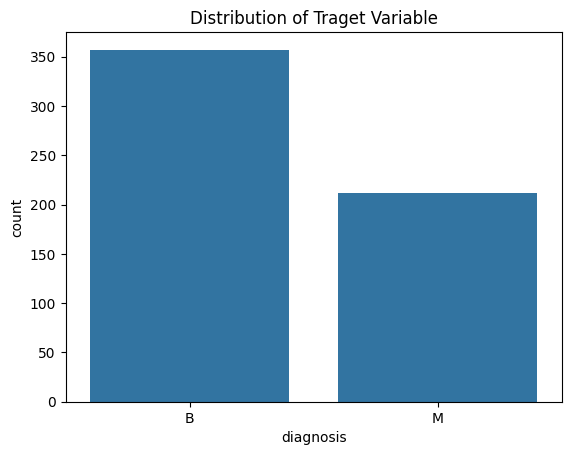

In [8]:
# Visualizing Class Distribution
sns.countplot(data=df, x='diagnosis', order=df['diagnosis'].value_counts().index)
plt.title('Distribution of Traget Variable')
plt.show()

The dataset contains a moderate class imbalance, with Benign (B) cases occuring more frequently than Malignant (M) cases.

### **Univariate Analysis**

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

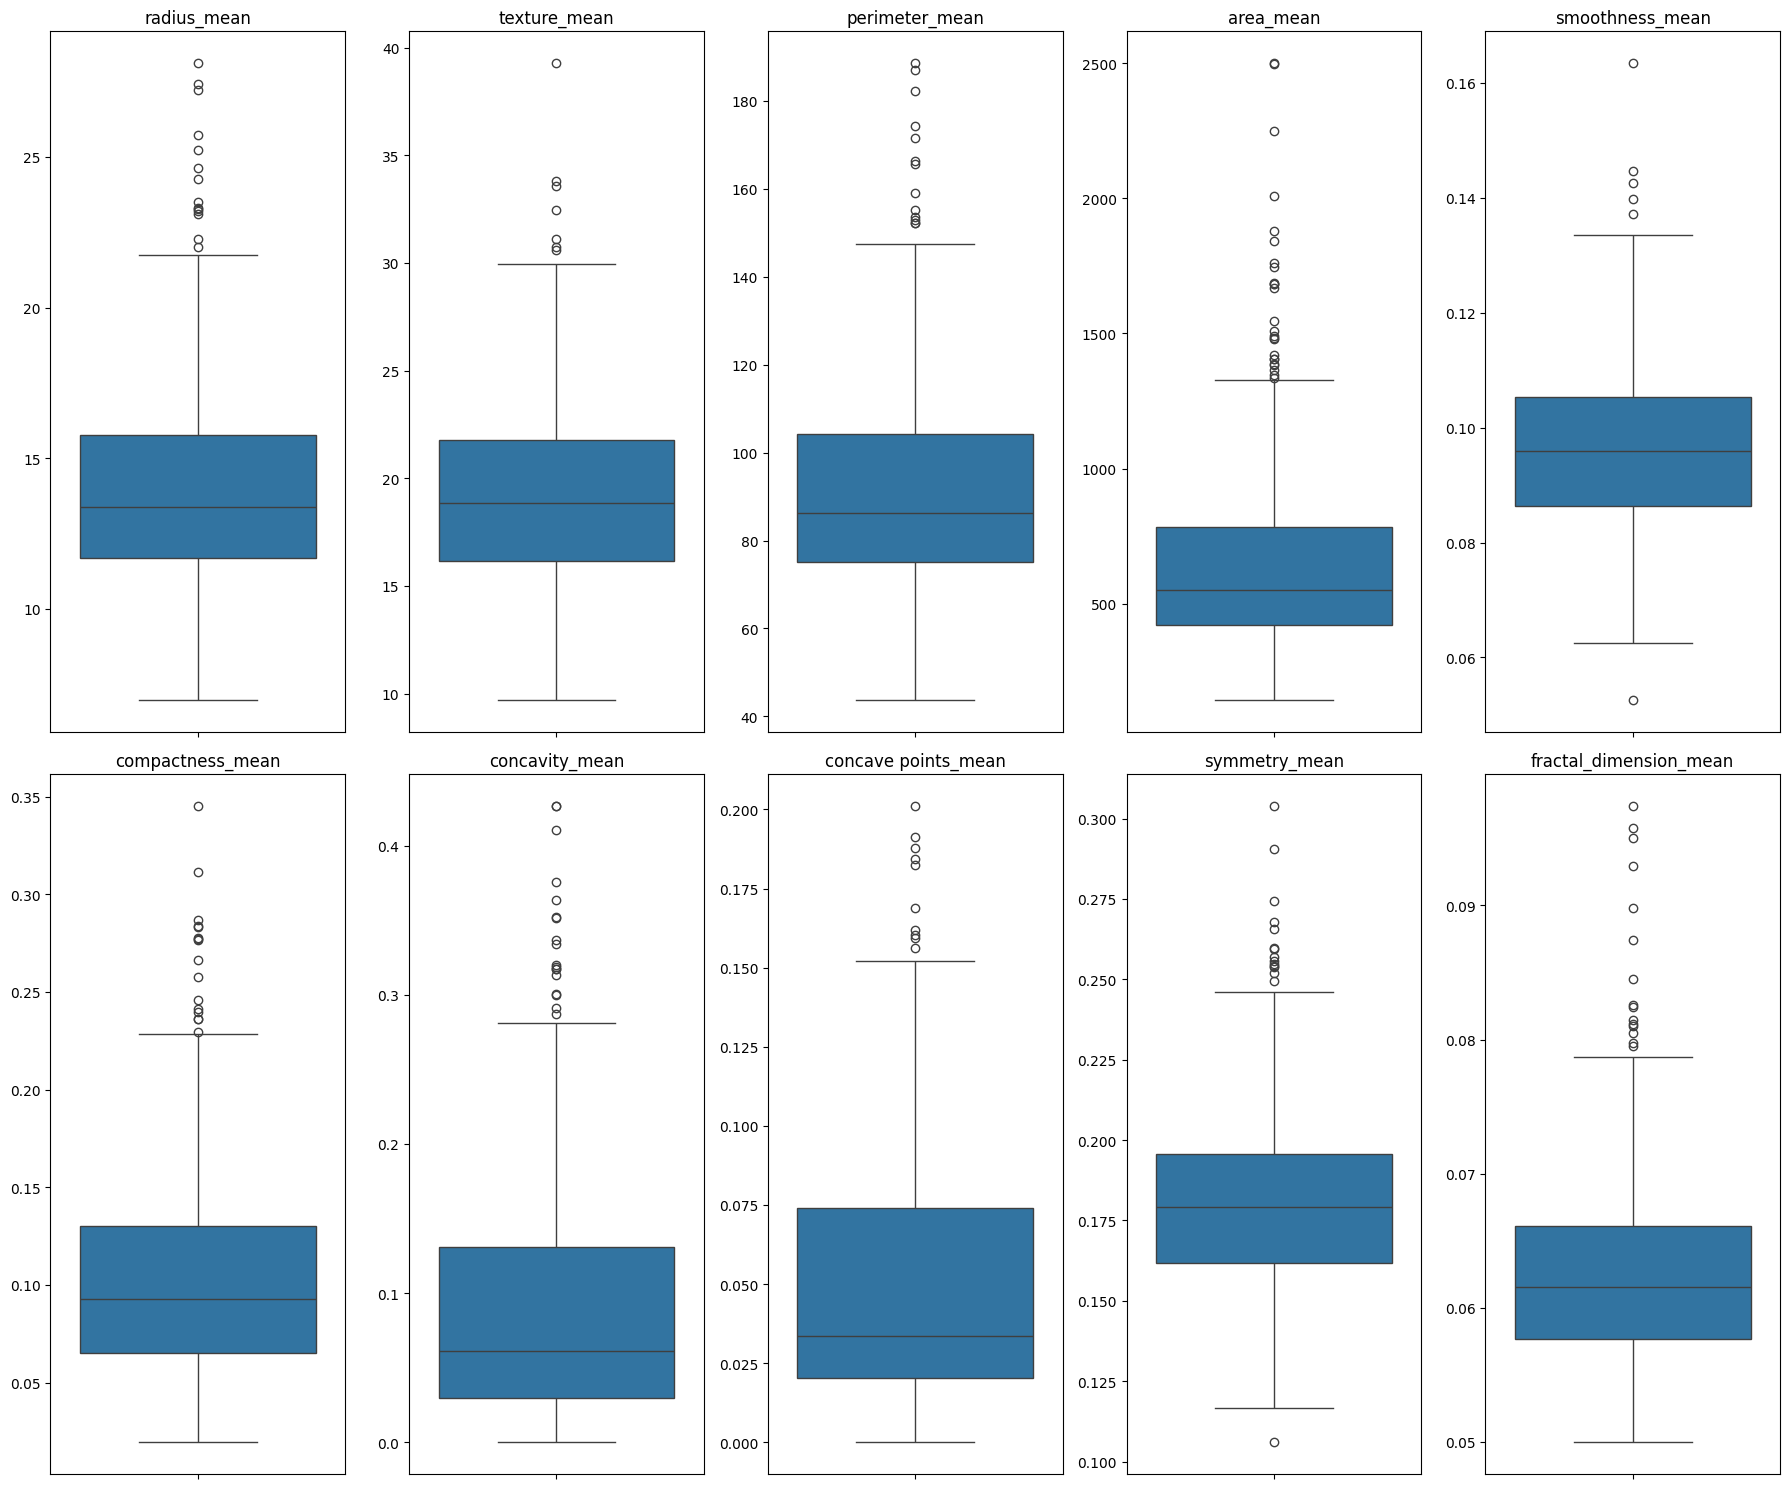

In [11]:
# Cheking Outliers for _mean columns
mean_cols = [c for c in df.columns if c.endswith('_mean')]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18,15))
axes = axes.flatten()

for ax, col in zip(axes, mean_cols):
  sns.boxplot(y=df[col], ax=ax)
  ax.set_title(col)
  ax.set_ylabel('')

plt.tight_layout()
plt.show()

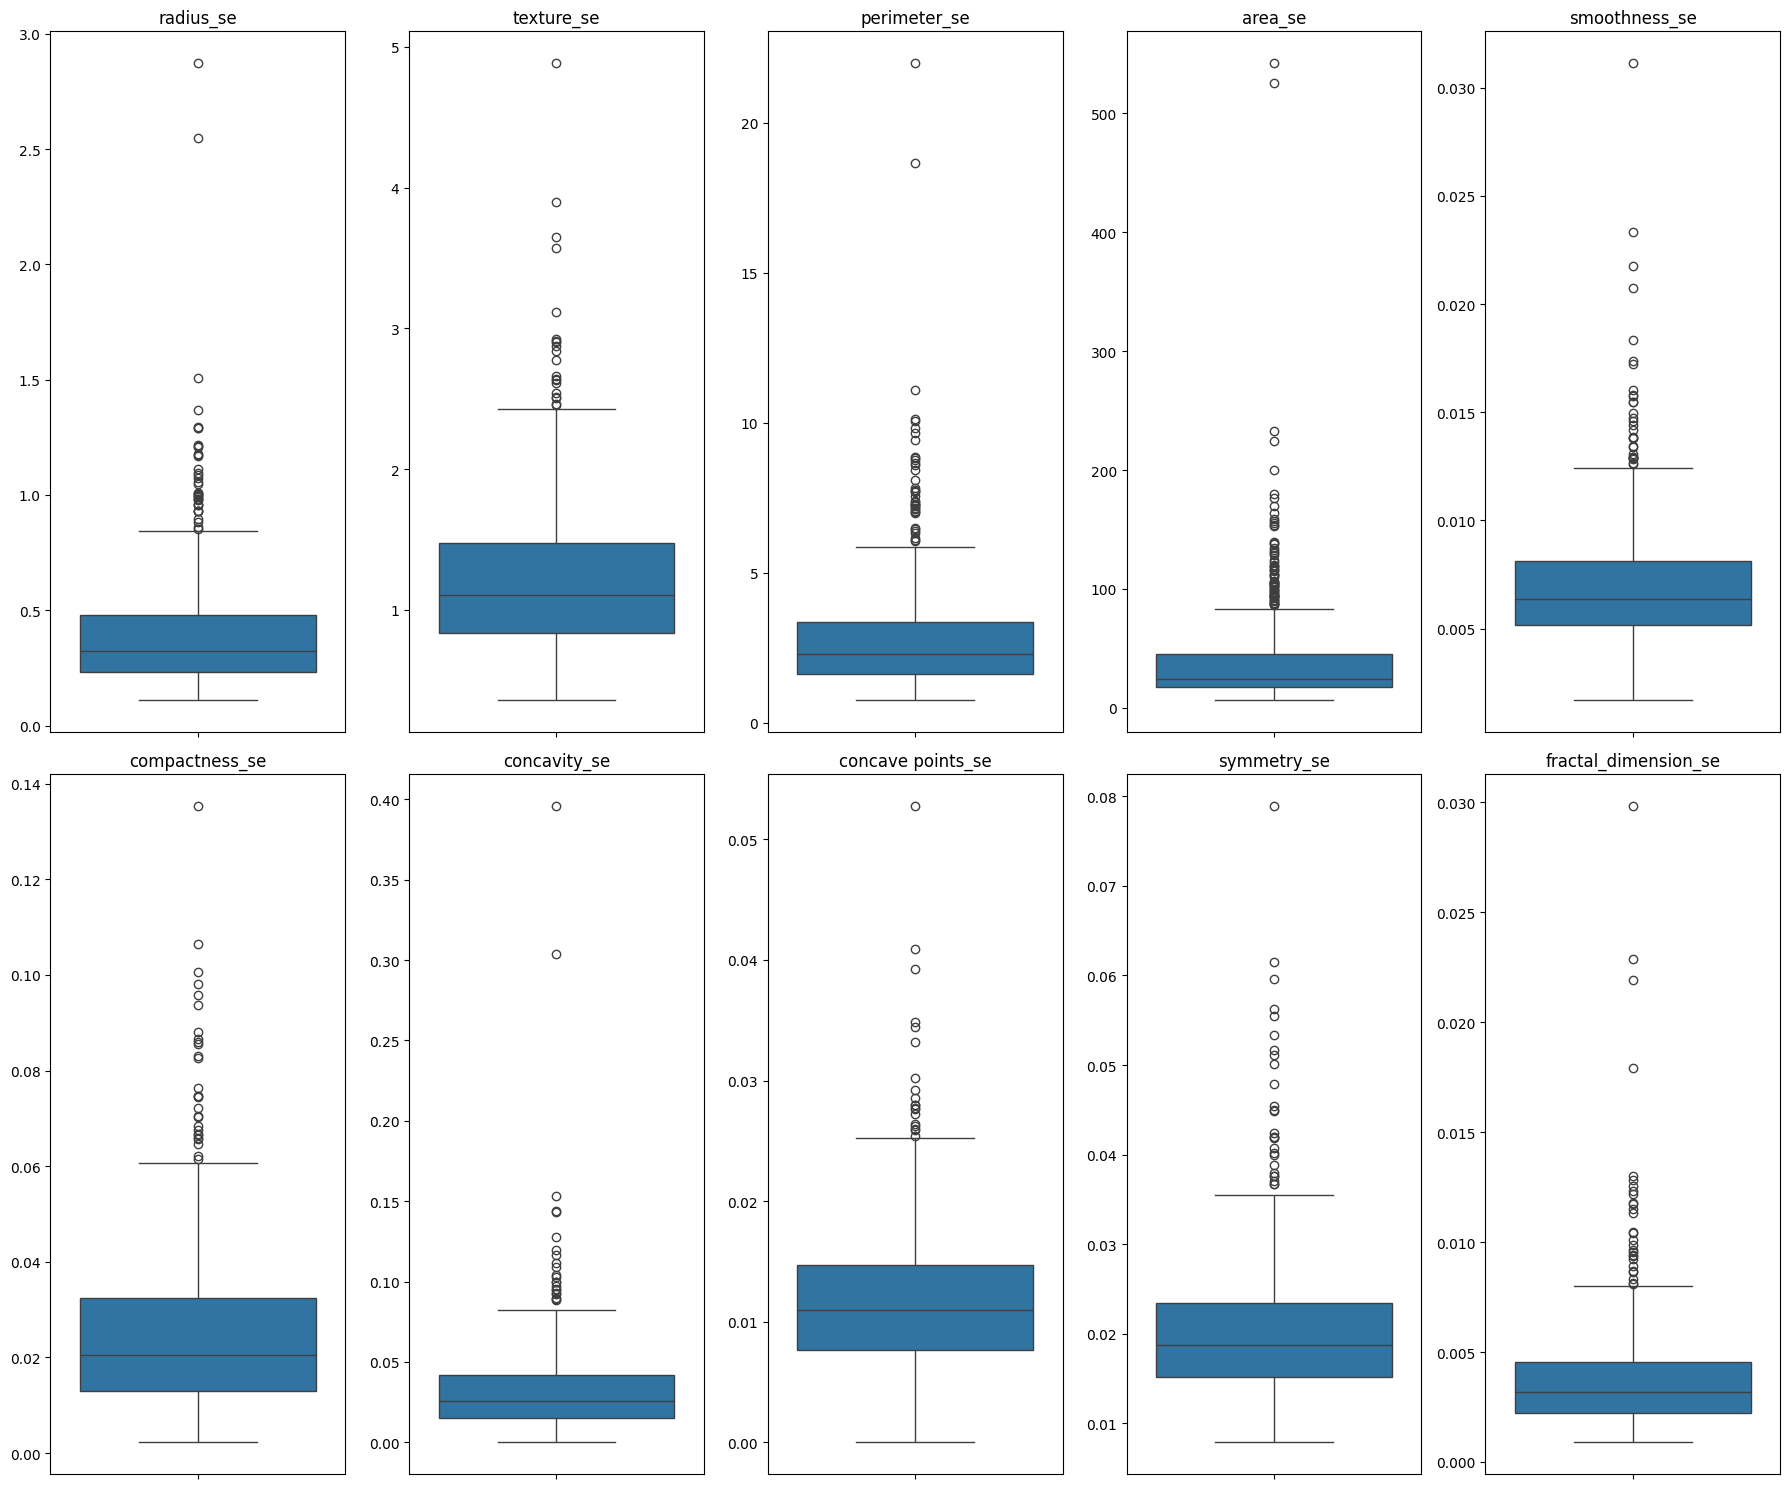

In [12]:
# Cheking Outliers for _se columns
se_cols = [c for c in df.columns if c.endswith('_se')]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18,15))
axes = axes.flatten()

for ax, col in zip(axes, se_cols):
  sns.boxplot(y=df[col], ax=ax)
  ax.set_title(col)
  ax.set_ylabel('')

plt.tight_layout()
plt.show()

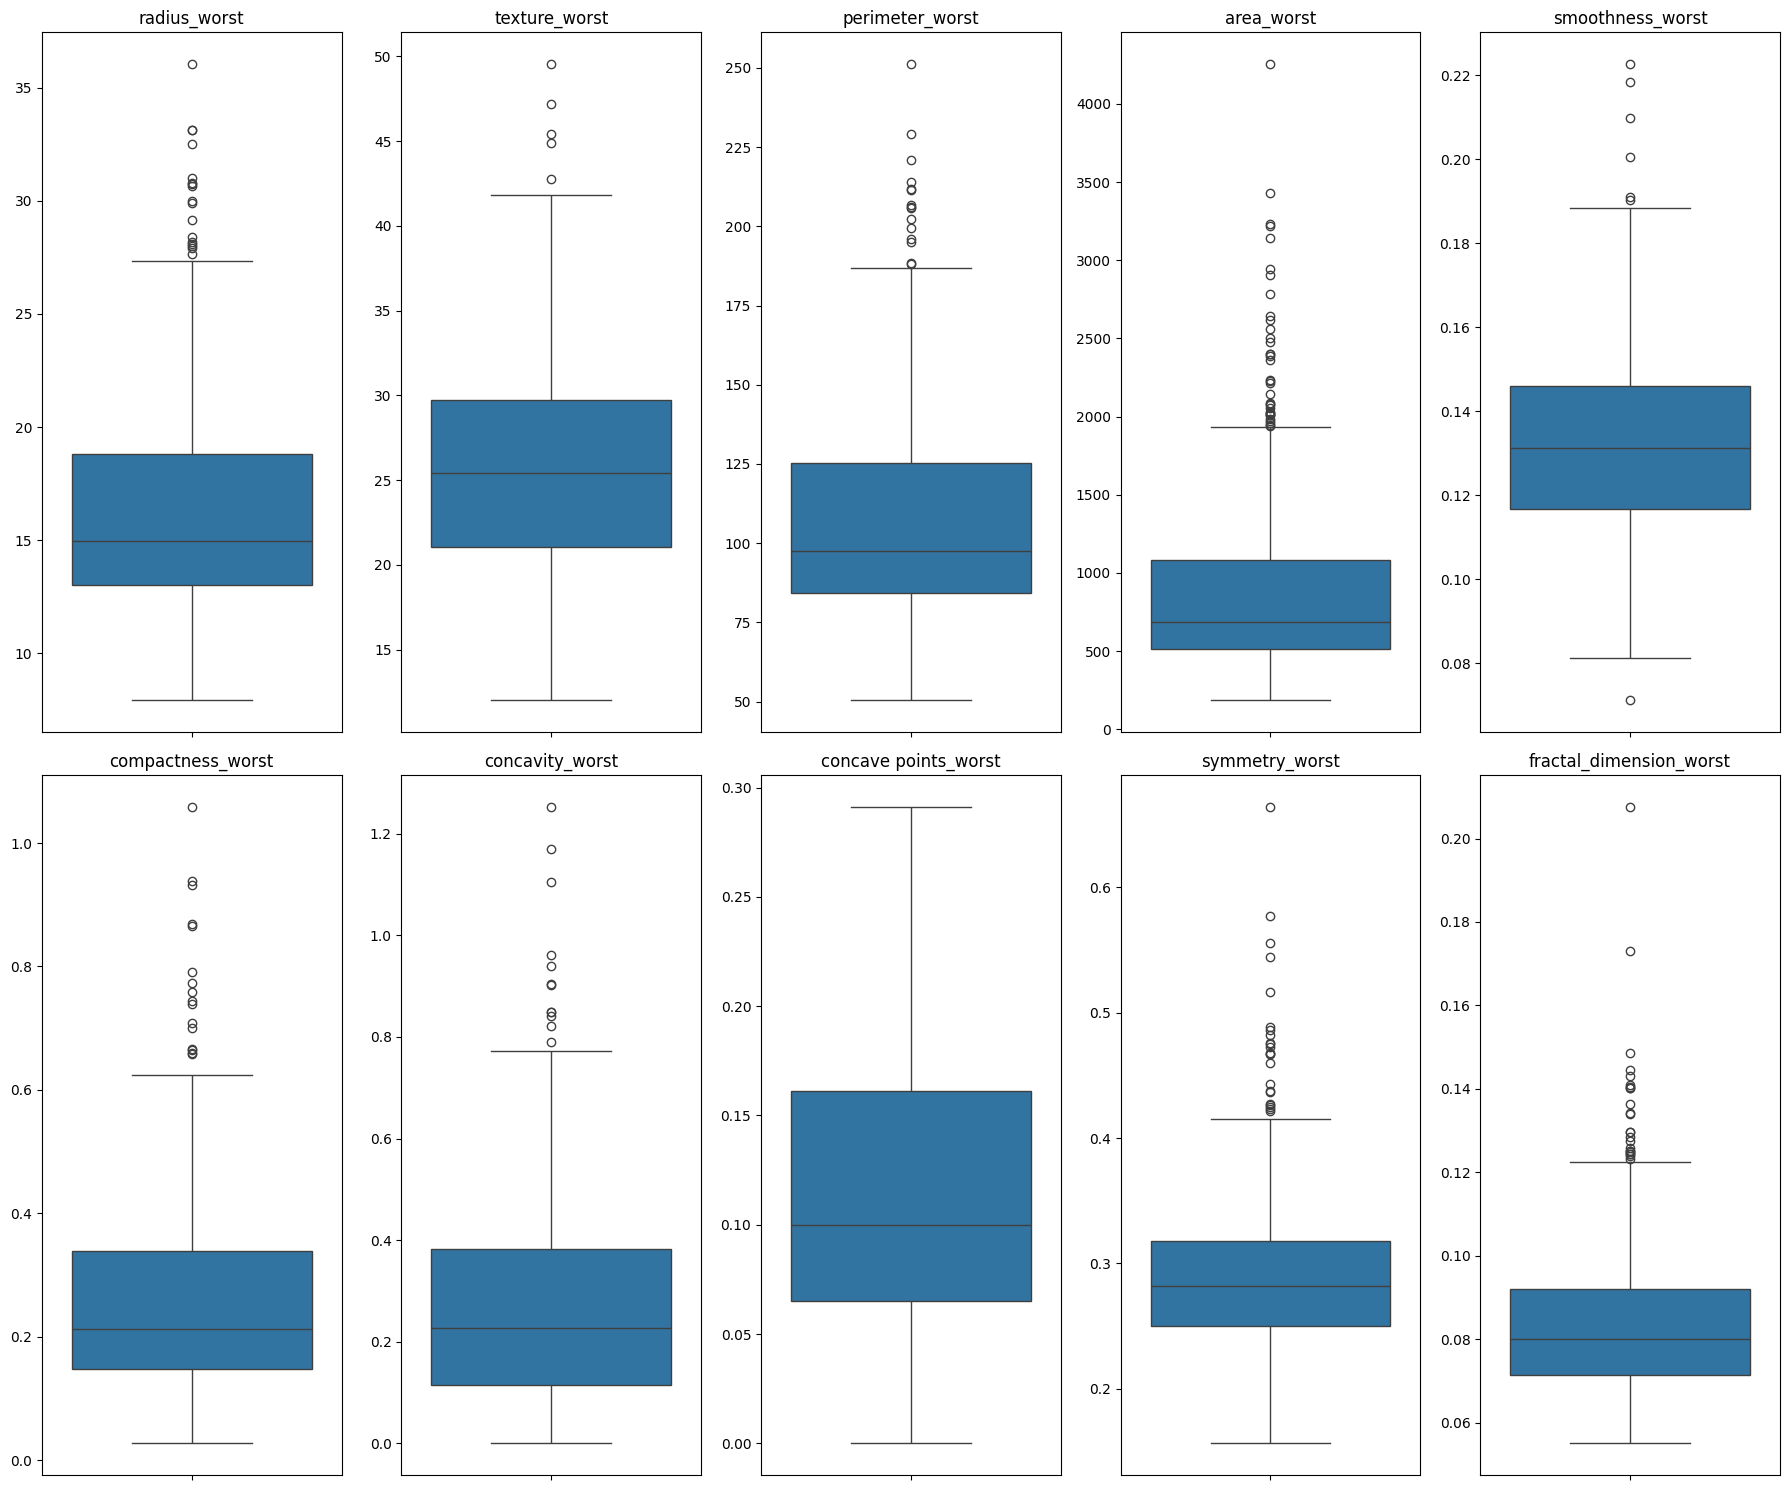

In [13]:
# Cheking Outliers for _worst columns
worst_cols = [c for c in df.columns if c.endswith('_worst')]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18,15))
axes = axes.flatten()

for ax, col in zip(axes, worst_cols):
  sns.boxplot(y=df[col], ax=ax)
  ax.set_title(col)
  ax.set_ylabel('')

plt.tight_layout()
plt.show()

Boxplots reveal the presence of extreme values across several size and shape related features. These outliers reflect genuine biological variation rather than data quality issues. Consequently, no outlier removal was performed. Although feature scaling is required to ensure fair model traning.

### **Feature vs Target Analysis**

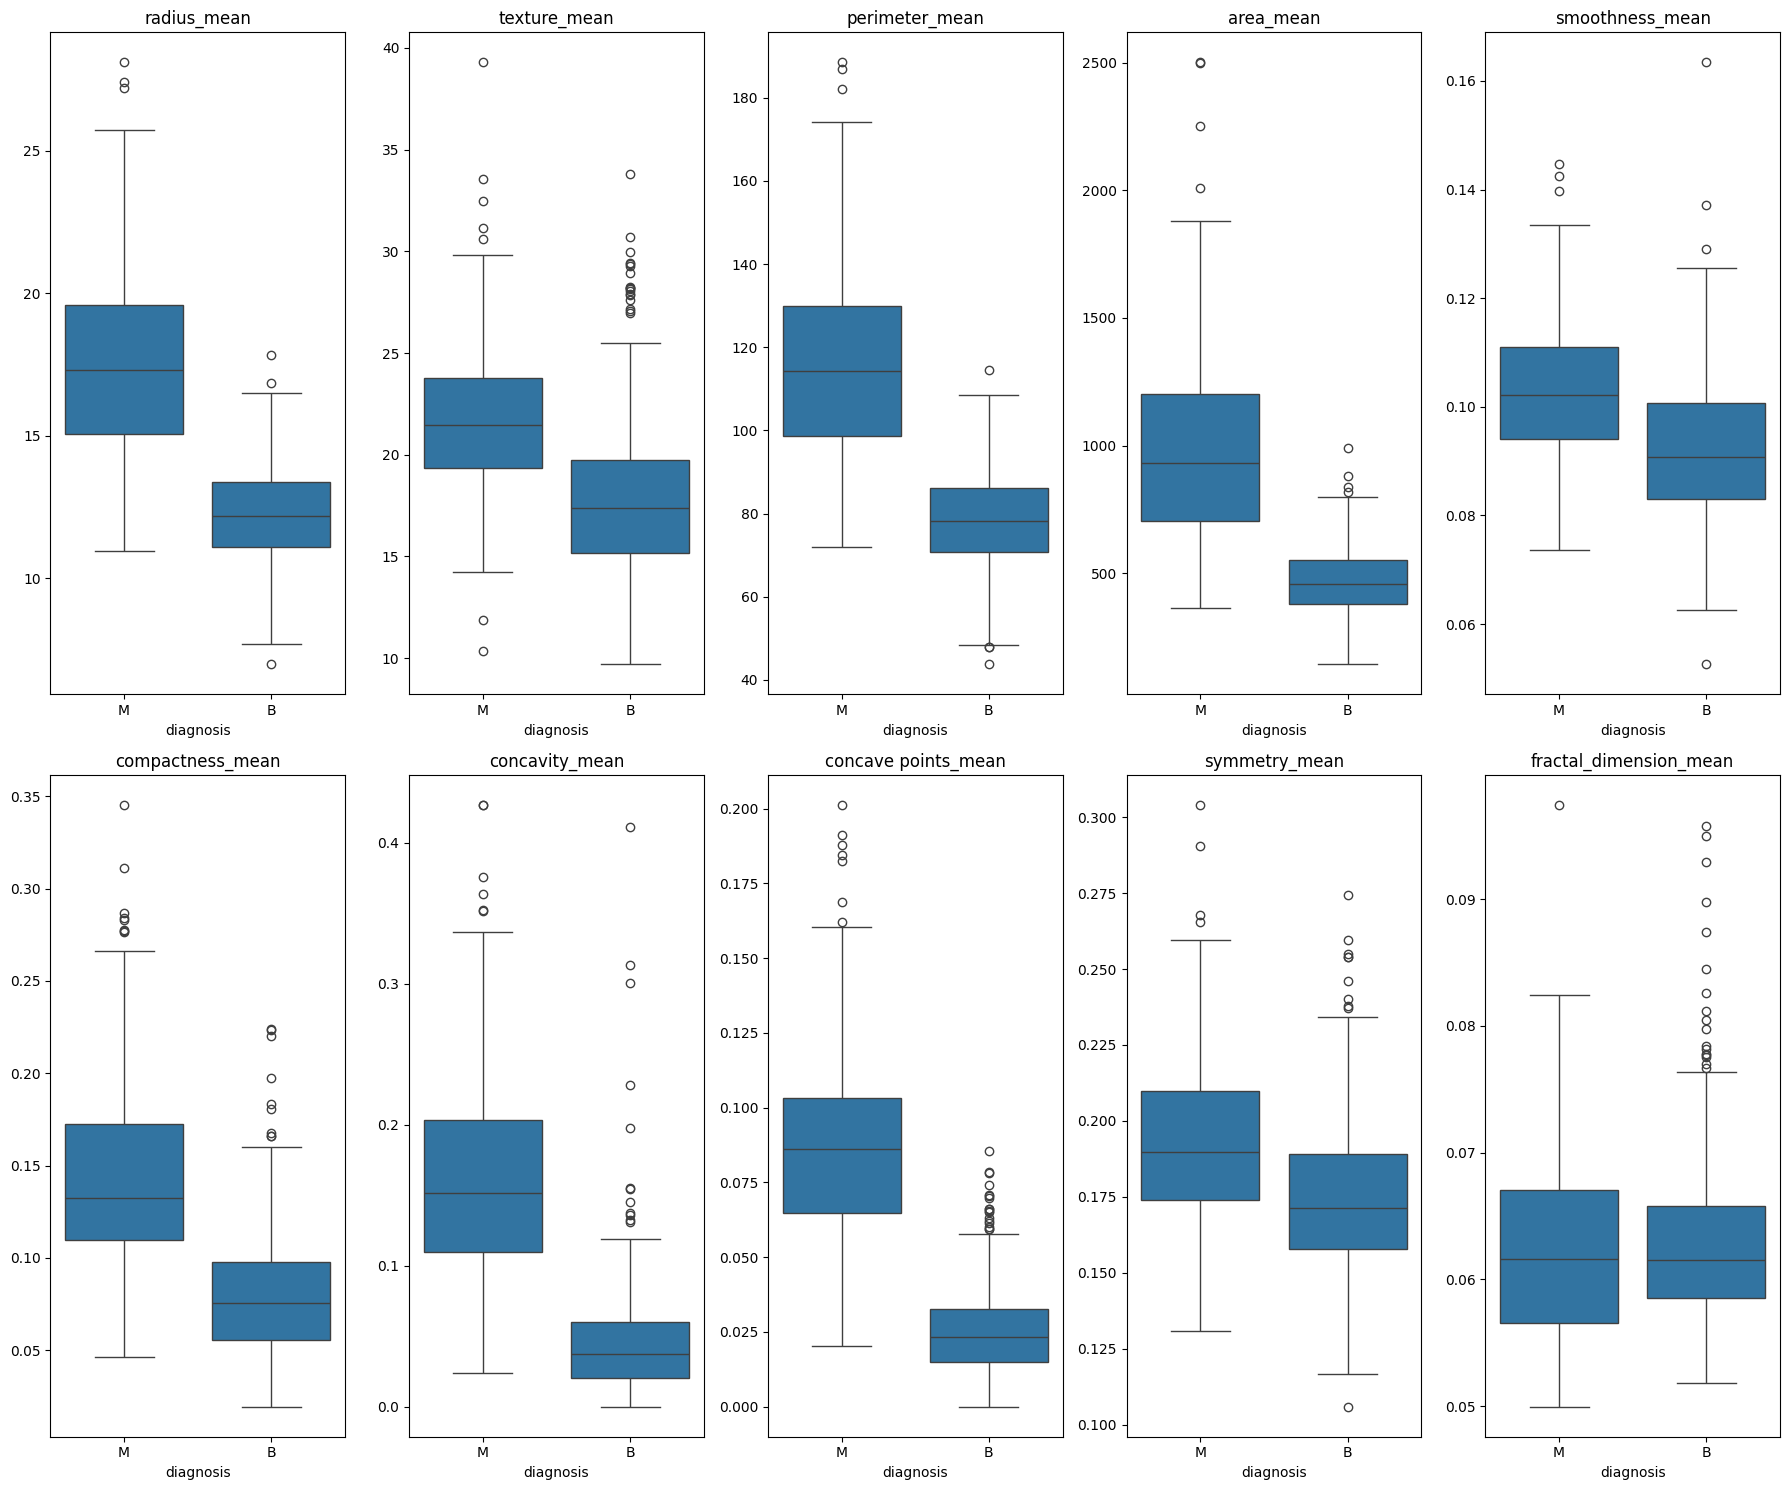

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18,15))
axes = axes.flatten()

for ax, col in zip(axes, mean_cols):
  sns.boxplot(data=df, y=col, x='diagnosis', ax=ax)
  ax.set_title(col)
  ax.set_ylabel('')
  ax.set_ylabel('')

plt.tight_layout()
plt.show()

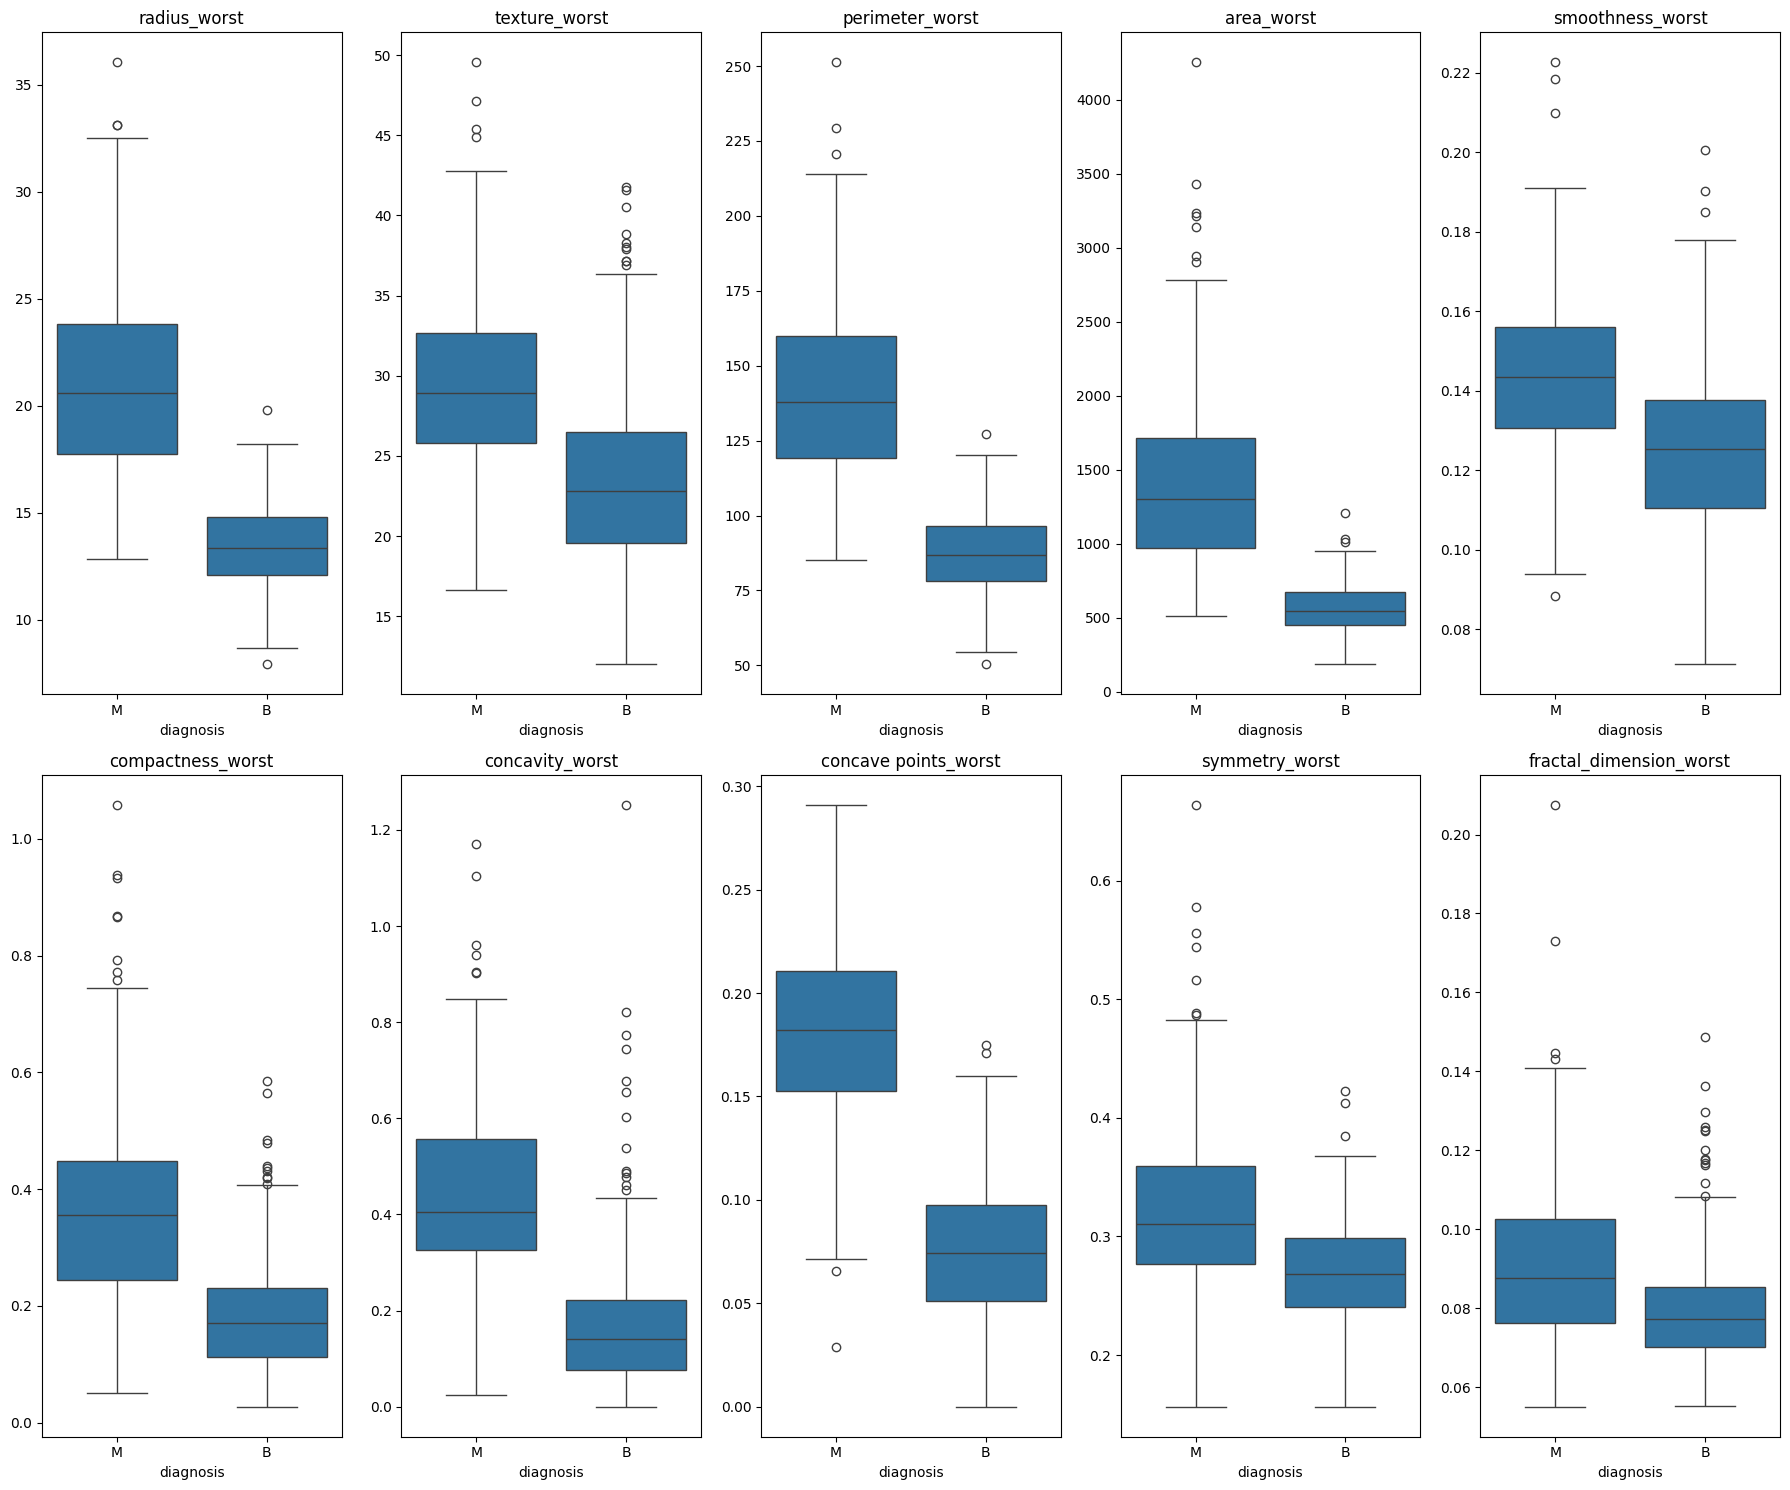

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18,15))
axes = axes.flatten()

for ax, col in zip(axes, worst_cols):
  sns.boxplot(data=df, y=col, x='diagnosis', ax=ax)
  ax.set_title(col)
  ax.set_ylabel('')
  ax.set_ylabel('')

plt.tight_layout()
plt.show()

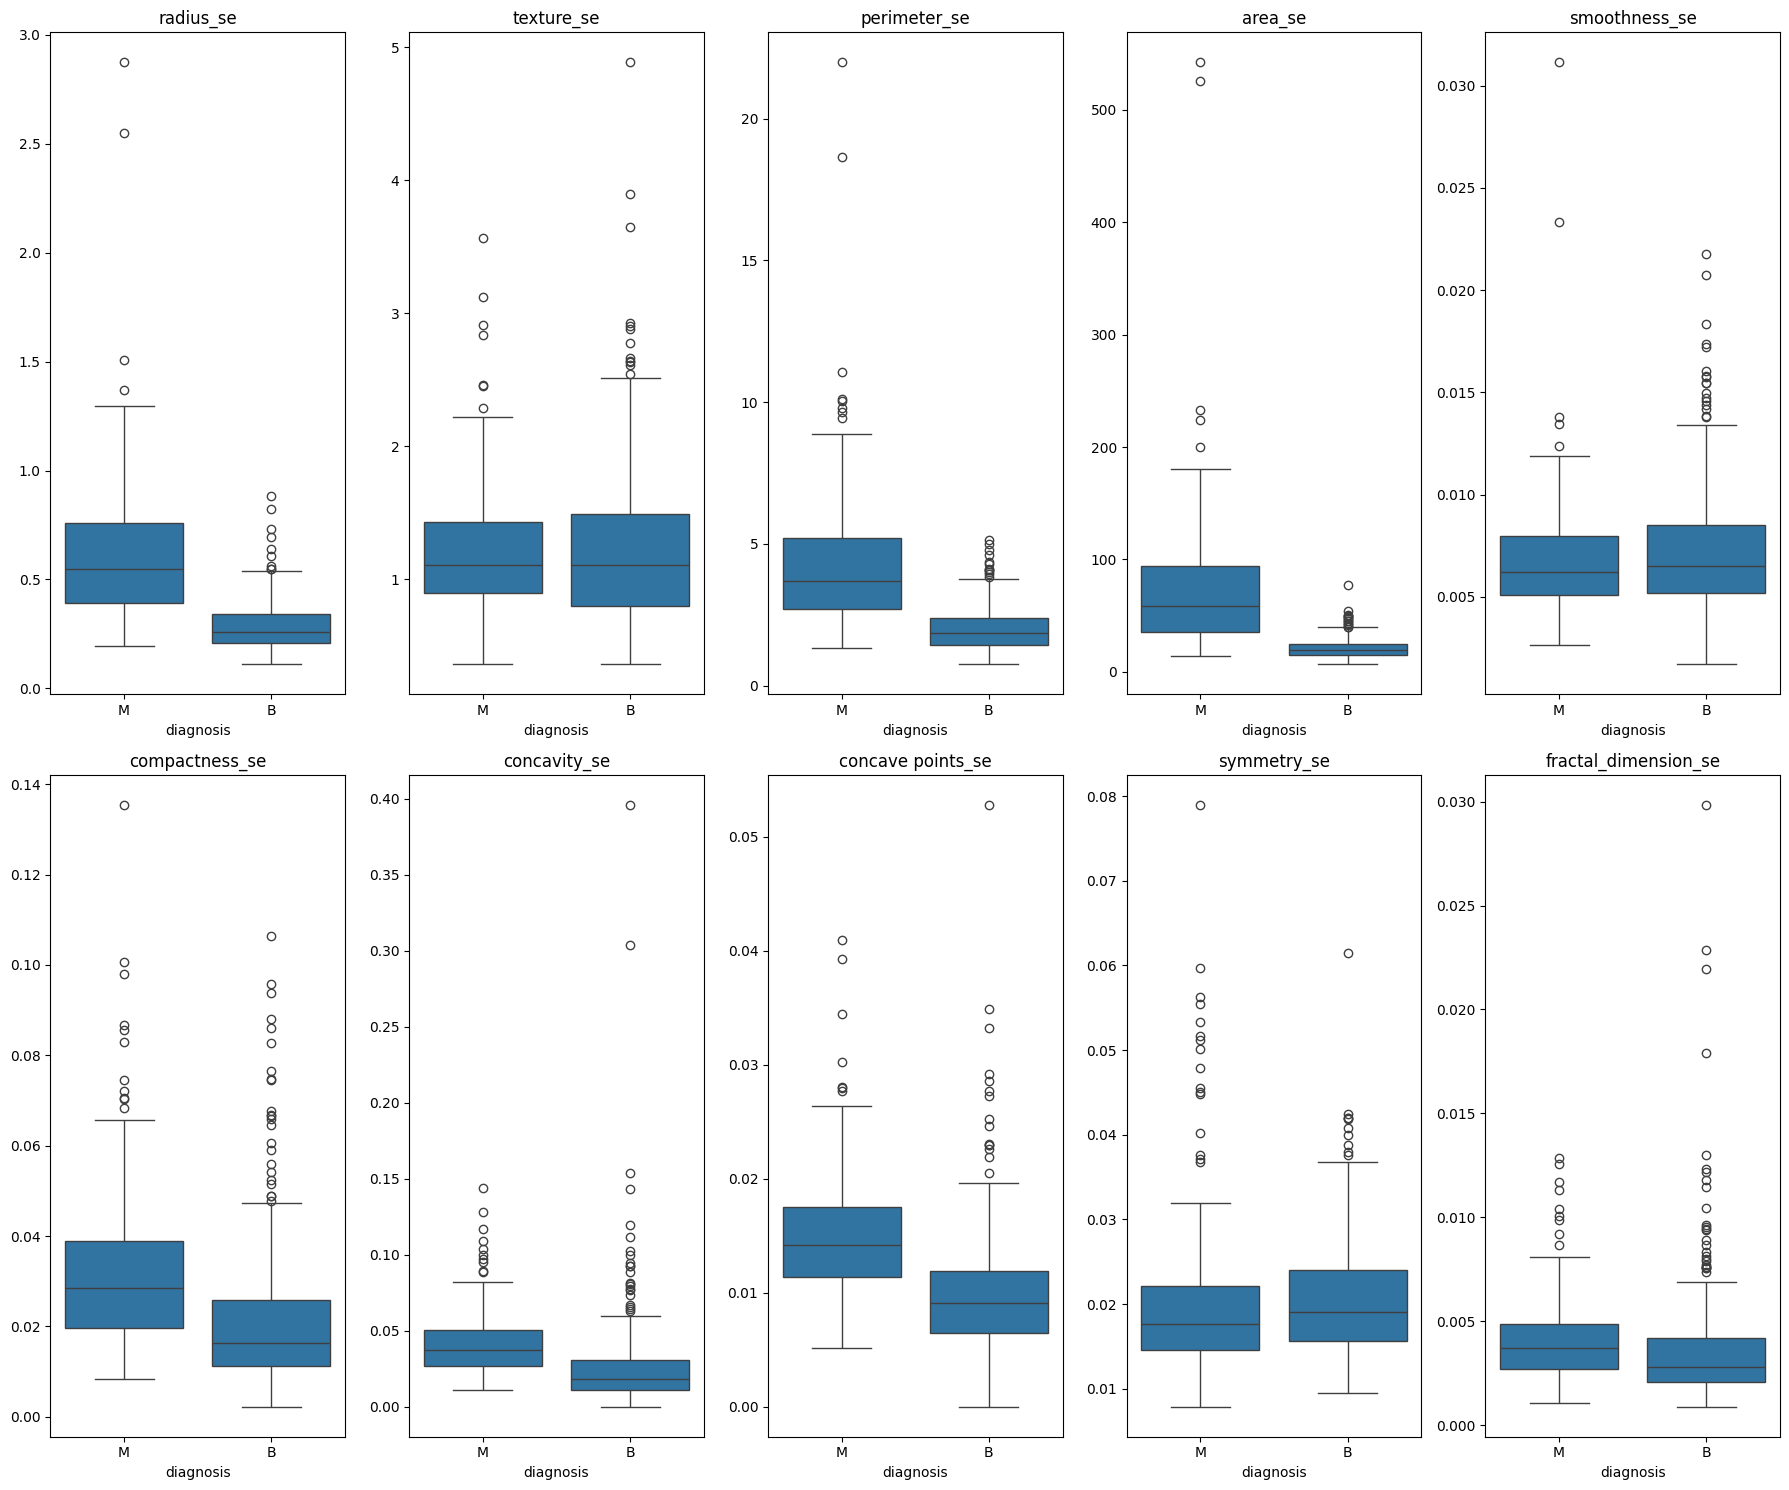

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18,15))
axes = axes.flatten()

for ax, col in zip(axes, se_cols):
  sns.boxplot(data=df, y=col, x='diagnosis', ax=ax)
  ax.set_title(col)
  ax.set_ylabel('')
  ax.set_ylabel('')

plt.tight_layout()
plt.show()

- Mean features (`*_mean`) show clear separation between classes, with malignant tumors exhibiting consistently higher values for size- and shape-related attributes (e.g., radius, perimeter, area, concavity).

- Worst-case features (`*_worst`) provide the strongest discrimination, capturing extreme tumor characteristics that are more prevalent in malignant cases.

- Standard error features (`*_se`) display substantial overlap between classes, indicating weaker standalone discriminative power and a more supportive role.

### **Correlation Analysis**

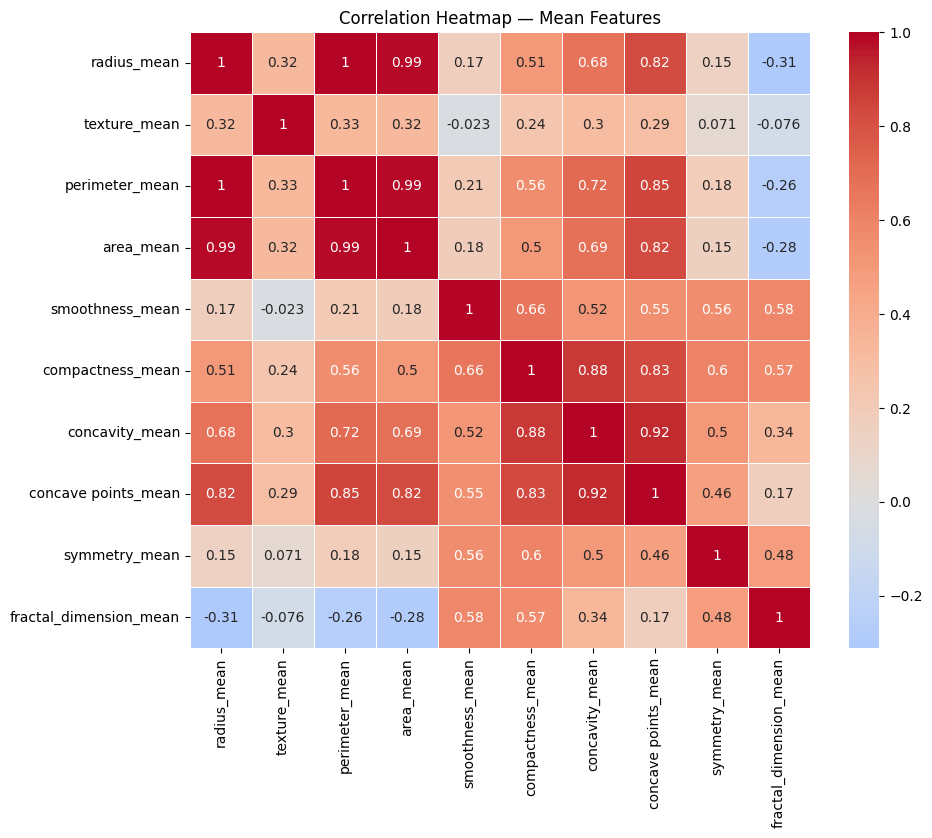

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[mean_cols].corr(),
    cmap='coolwarm',
    annot=True,
    center=0,
    linewidths=0.5
)
plt.title("Correlation Heatmap — Mean Features")
plt.show()

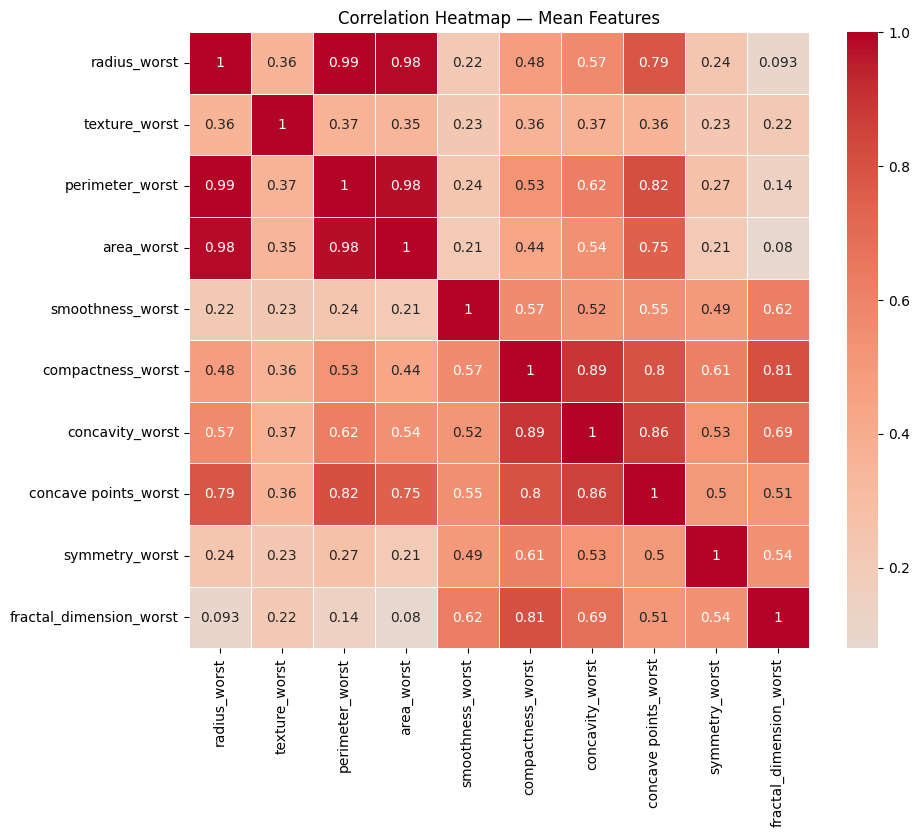

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[worst_cols].corr(),
    cmap='coolwarm',
    annot=True,
    center=0,
    linewidths=0.5
)
plt.title("Correlation Heatmap — Mean Features")
plt.show()

Correlation analysis revealed strong multicollinearity among size-related features such as radius, perimeter, and area, as well as among shape irregularity measures including concavity and concave points. These correlations are expected due to the physical relationships between features and justify the use of feature scaling and regularization during modeling rather than aggressive feature removal.

# **Pre-processing and Modeling**

I will be using following models for this current project

- Logistic Regression
- Support Vector Machine (SVM)
- Random Forest
- K-Nearest Neighbours (KNN)

In [19]:
# Importing model libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

In [20]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [21]:
# Features and target
X = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
y = df['diagnosis'].map({'B':0, 'M':1})

# Train/Test split (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Common preprocessing
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

### **Baseline Models**

In [22]:
# Logistic Regression
baseline_log_reg = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Support Vector Machine (RBF)
baseline_svm = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42))
])

# Random Forest Classifier - Random Forest does not require scaling, so preprocessing is intentionally excluded.
baseline_rf = Pipeline(steps=[
    ('model', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
])

# KNN
baseline_knn = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

models = {
    'Logistic Regression': baseline_log_reg,
    'SVM (RBF)': baseline_svm,
    'Random Forest Classification': baseline_svm,
    'KNN': baseline_knn
}

In [23]:
# Model Evaluation
for name, pipeline in models.items():
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  y_proba = pipeline.predict_proba(X_test)[:, 1]

  print(f'\n{name}')
  print('ROC-AUC:', roc_auc_score(y_test, y_proba))
  print(classification_report(y_test, y_pred))


Logistic Regression
ROC-AUC: 0.9953703703703703
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


SVM (RBF)
ROC-AUC: 0.9953703703703705
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Random Forest Classification
ROC-AUC: 0.9953703703703705
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                        

# **Final Project Conclusion**

**Summary of Findings**

- The dataset is **clean**, **well-structured**, and **information-rich**, with strong signal present in size- and shape-related features.

- Exploratory Data Analysis revealed:

  - Clear but overlapping separation between classes

  - Strong multicollinearity among related features

- No data quality issues requiring outlier removal

- Multiple baseline models were evaluated using a consistent preprocessing and evaluation framework.

<br>

**Model Performance Overview**

- **Logistic Regression** achieved strong performance with **high ROC–AUC** and **good malignant recall**, serving as a reliable and interpretable baseline.

- **Support Vector Machine (RBF)** and **Random Forest** slightly outperformed Logistic Regression, **achieving near-perfect ROC–AUC** and **higher malignant recall**.

- **KNN underperformed relative to other models**, particularly in malignant recall, and was therefore not considered a final candidate.

Across all strong models, **ROC–AUC scores** were already near saturation **(~0.995)**, and differences in accuracy and recall were marginal.

<br>

**Final Model Consideration**

**Logistic Regression** remains valuable for **interpretability** and **transparency**.

**SVM (RBF)** and **Random Forest** provide the best balance of **performance** and **robustness**.

Given the negligible performance differences, **model choice can be guided by deployment constraints (interpretability vs flexibility)** rather than raw metrics alone.